In [2]:
%matplotlib inline

In [8]:
z.shape

(100, 100)

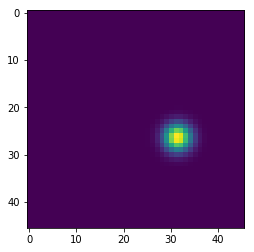

In [40]:
size = 1
sigma_x = 2
sigma_y = 2

x = np.linspace(-23, 23, 46)
y = np.linspace(-23, 23, 46)

x, y = np.meshgrid(x, y)
z_1 = (1/(2*np.pi*(sigma_x)*sigma_y) * np.exp(-((x-9)**2/(2*sigma_x**2)
     + (y-4)**2/(2*(sigma_y)**2))))

sigma_x = 2
sigma_y = 3
x = np.linspace(-23, 23, 46)
y = np.linspace(-23, 23, 46)

x, y = np.meshgrid(x, y)
z_2 = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((x-1)**2/(2*sigma_x**2)
     + (y-2)**2/(2*sigma_y**2))))
z_f = z_1 + z_2
plt.imshow(z_1)

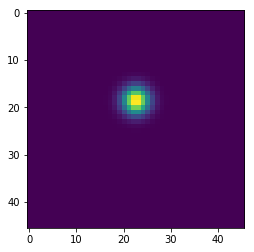

In [43]:
size = 1
sigma_x = 2
sigma_y = 2

x = np.linspace(-23, 23, 46)
y = np.linspace(-23, 23, 46)

x, y = np.meshgrid(x, y)
z_1 = (1/(2*np.pi*(sigma_x)*sigma_y) * np.exp(-((x)**2/(2*sigma_x**2)
     + (y+4)**2/(2*(sigma_y)**2))))

sigma_x = 2
sigma_y = 3
x = np.linspace(-23, 23, 46)
y = np.linspace(-23, 23, 46)

x, y = np.meshgrid(x, y)
z_2 = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((x)**2/(2*sigma_x**2)
     + (y-4)**2/(2*sigma_y**2))))
z_f = z_1 + z_2
plt.imshow(z_1)

array([[2.72258717e-97, 8.50783759e-94, 2.04740546e-90, ...,
        1.84150754e-49, 7.61278301e-51, 2.42359847e-52],
       [2.37075870e-94, 7.40840558e-91, 1.78282788e-87, ...,
        1.60353728e-46, 6.62901513e-48, 2.11040705e-49],
       [1.58979154e-91, 4.96795414e-88, 1.19553486e-84, ...,
        1.07530555e-43, 4.44530781e-45, 1.41520403e-46],
       ...,
       [2.52990648e-73, 7.90572793e-70, 1.90250817e-66, ...,
        1.71118188e-25, 7.07401741e-27, 2.25207756e-28],
       [2.91435585e-75, 9.10709731e-72, 2.19161691e-68, ...,
        1.97121632e-27, 8.14899849e-29, 2.59430753e-30],
       [2.58540129e-77, 8.07914417e-74, 1.94424067e-70, ...,
        1.74871755e-29, 7.22918966e-31, 2.30147805e-32]])

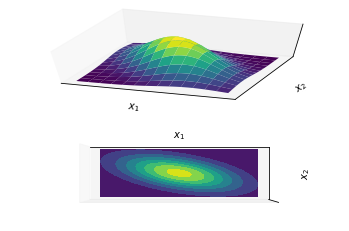

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()